This is a sentiment & text analysis project that parses the Twitter tweets using Python

In [1]:
#Importing necessary libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spacy import displacy
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Geting credentials data
log= pd.read_csv("Login.csv",header=None)

In [3]:
#Twitter API credentials
consumerKey=log[1][0]
consumerSecret=log[1][1]
accessToken=log[1][3]
accessTokenSecret=log[1][4]

In [4]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [5]:
#Extract 100 tweets from the twitter user
posts= api.user_timeline(screen_name="billgates",count=100,lang="en",tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[0:5]:
    print(str(i)+')'+ tweet.full_text + '\n')
    i=i+1

Show the 5 recent tweets:

1)Against the odds, @MohamedBailorB8 became a doctor and is helping his country recover from civil war, Ebola, and now COVID-19. This doctor’s life story is almost as remarkable as his work. https://t.co/giKIhT4W8b

2)This is an important step in the U.S. clean energy transition. I’m excited to see @TerraPower working with @PacifiCorp, @GovernorGordon, and @Energy to bring this project to life with the workforce of Wyoming. https://t.co/AYeFV5aO5b

3)Heroes like Dr. Mohamed Barrie are the reason we started our foundation more than 20 years ago and why Melinda and I remain committed to its work. Mohamed’s story is truly inspiring, and I can’t wait to see what he and his team will accomplish next. https://t.co/ovDzfwSKwP

4)RT @MSuzman: Promising news from the @Gavi #COVAX AMC Summit as they have exceeded today’s fundraising target. This means more people in lo…

5)This partnership between @Breakthrough Energy and the @EU_Commission will create jobs around the 

In [6]:
#Create a datafrane with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,"Against the odds, @MohamedBailorB8 became a do..."
1,This is an important step in the U.S. clean en...
2,Heroes like Dr. Mohamed Barrie are the reason ...
3,RT @MSuzman: Promising news from the @Gavi #CO...
4,This partnership between @Breakthrough Energy ...


In [7]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text) #Removes @mentions
    text=re.sub(r'#','',text) #Removes the '#' symbol
    text=re.sub(r'RT[\s]+','',text) #Removes RT
    text= re.sub(r'https?:\/\/\S+','',text) #Removes the hyper link
    text=re.sub(r':','',text) #Removes the ':' symbol
    text=re.sub(r',','',text) #Removes the ',' symbol
          
    return text
#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,Against the odds became a doctor and is helpi...
1,This is an important step in the U.S. clean en...
2,Heroes like Dr. Mohamed Barrie are the reason ...
3,Promising news from the COVAX AMC Summit as ...
4,This partnership between Energy and the _Comm...
...,...
95,The President’s commitment to reengage with th...
96,With Americans across the country working toge...
97,I look forward to working with President and ...
98,MLKDay has long been a national day of service...


In [8]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns 
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,Against the odds became a doctor and is helpi...,0.750000,0.750000
1,This is an important step in the U.S. clean en...,0.816667,0.380556
2,Heroes like Dr. Mohamed Barrie are the reason ...,0.500000,0.333333
3,Promising news from the COVAX AMC Summit as ...,0.500000,0.350000
4,This partnership between Energy and the _Comm...,0.000000,0.000000
...,...,...,...
95,The President’s commitment to reengage with th...,0.600000,-0.400000
96,With Americans across the country working toge...,0.512500,0.212500
97,I look forward to working with President and ...,0.000000,0.000000
98,MLKDay has long been a national day of service...,0.471667,0.200000


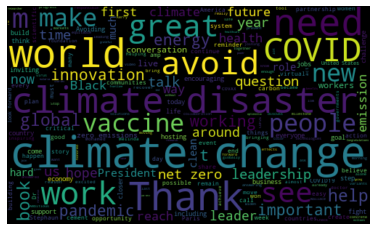

In [9]:
#Create stopwords 
stopwords = set(STOPWORDS)
stopwords.add('Said') 
stopwords.add('say')
stopwords.add('S')
stopwords.add('U')
stopwords.add('says')
stopwords.add('two')
stopwords.add('take')
stopwords.add('one')
stopwords.add('according')
stopwords.add('will')
#Plot the Word Cloud
allWords= ''.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state=21, max_font_size=119,stopwords=stopwords).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']= df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Against the odds became a doctor and is helpi...,0.750000,0.750000,Positive
1,This is an important step in the U.S. clean en...,0.816667,0.380556,Positive
2,Heroes like Dr. Mohamed Barrie are the reason ...,0.500000,0.333333,Positive
3,Promising news from the COVAX AMC Summit as ...,0.500000,0.350000,Positive
4,This partnership between Energy and the _Comm...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The President’s commitment to reengage with th...,0.600000,-0.400000,Negative
96,With Americans across the country working toge...,0.512500,0.212500,Positive
97,I look forward to working with President and ...,0.000000,0.000000,Neutral
98,MLKDay has long been a national day of service...,0.471667,0.200000,Positive


In [11]:
#Print all of the positive tweets 
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Against the odds  became a doctor and is helping his country recover from civil war Ebola and now COVID-19. This doctor’s life story is almost as remarkable as his work. 

2)This is an important step in the U.S. clean energy transition. I’m excited to see  working with   and  to bring this project to life with the workforce of Wyoming. 

3)Heroes like Dr. Mohamed Barrie are the reason we started our foundation more than 20 years ago and why Melinda and I remain committed to its work. Mohamed’s story is truly inspiring and I can’t wait to see what he and his team will accomplish next. 

4) Promising news from the  COVAX AMC Summit as they have exceeded today’s fundraising target. This means more people in lo…

5)The pandemic has exacerbated existing racial health inequities in the United States. The Health Equity Tracker is a new tool bringing visibility to disparities in U.S. medicine. 

6) As our CEO  says no barriers should stand in the way of equitable access to vaccines. We are s

In [12]:
#print all the negative tweets 
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2)Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects  

4) Over the past few weeks health workers in Ethiopia 🇪🇹 Nigeria 🇳🇬 Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)For decades Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) Black folks have questions about the COVID-19 vaccine. I

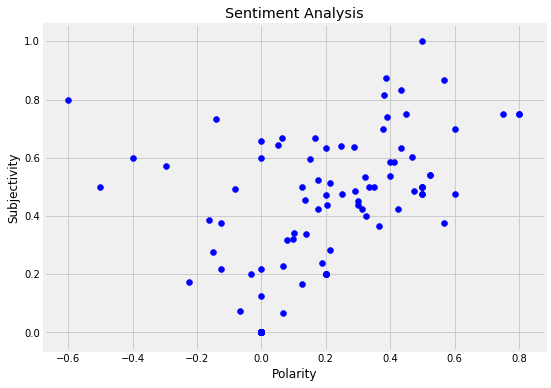

In [13]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0]/df.shape[0]*100,1)

66.0

In [15]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0]/df.shape[0]*100,1)

14.0

In [16]:
#Get the percentage of neutral tweets
Netweets = df[df.Analysis == 'Neutral']
Neweets = Netweets['Tweets']

round(Netweets.shape[0]/df.shape[0]*100,1)

20.0

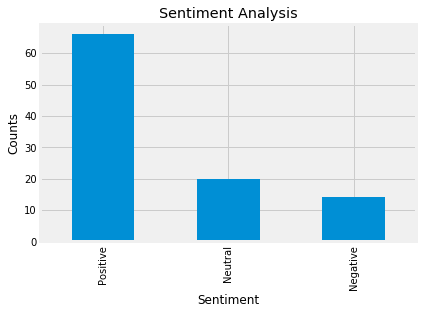

In [17]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')

In [18]:
#Create a datafrane with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text) #Removes @mentions
    text=re.sub(r'#','',text) #Removes the '#' symbol
    text=re.sub(r'RT[\s]+','',text) #Removes RT
    text= re.sub(r'https?:\/\/\S+','',text) #Removes the hyper link
    text=re.sub(r':','',text) #Removes the ':' symbol
    text=re.sub(r',','',text) #Removes the ',' symbol
    text=re.sub(r'%','',text) #Removes the '%' symbol
    text=re.sub(r'\n','',text) #Removes the '\n' symbol
    
    return text
#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,Against the odds became a doctor and is helpi...
1,This is an important step in the U.S. clean en...
2,Heroes like Dr. Mohamed Barrie are the reason ...
3,Promising news from the COVAX AMC Summit as ...
4,This partnership between Energy and the _Comm...
...,...
95,The President’s commitment to reengage with th...
96,With Americans across the country working toge...
97,I look forward to working with President and ...
98,MLKDay has long been a national day of service...


In [19]:
#This splits all the sentences up which makes it easier for us to work with
df1 = df.to_string()

df_split = df1.split()


all_sentences = []

for word in df_split:
    all_sentences.append(word)
    
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [20]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines:
    stem.append(s_stemmer.stem(word))

In [21]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [22]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [23]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 348, 2: 45, 3: 15, 4: 3, 14: 2, 8: 2, 9: 1, 7: 1, 6: 1, 5: 1})

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.rcParams.update({'font.size': 12})

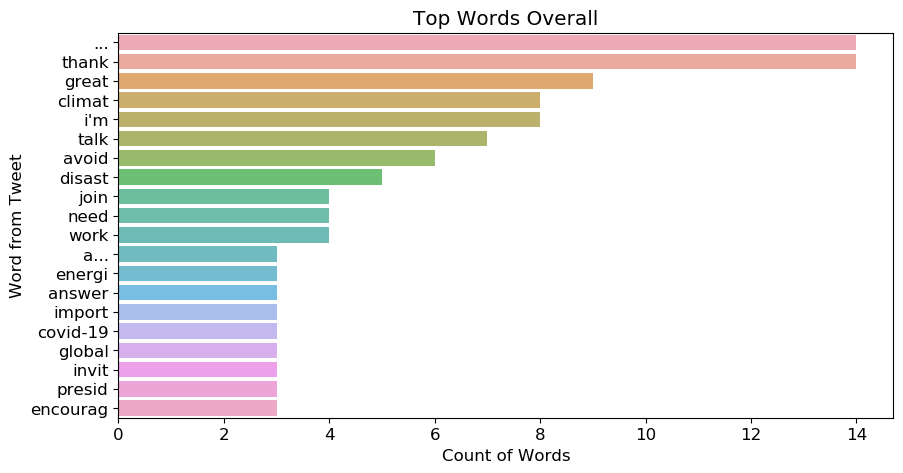

In [25]:
#This is a simple plot that shows the top 20 words being used

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [26]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [27]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [28]:
str1 = " " 
stem2 = str1.join(lines)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

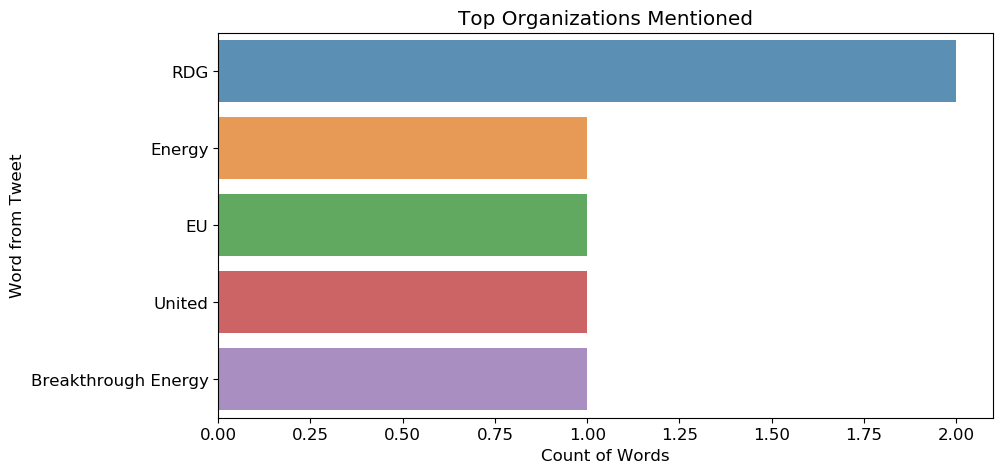

In [29]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()